<a href="https://colab.research.google.com/github/Neulvo/TIL/blob/master/nsmc_tryout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
vocab_size = 10000
embedding_dim = 16
max_length= 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [10]:
import pandas as pd
import numpy as np

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
train=pd.read_csv('/content/drive/My Drive/data/nsmc/ratings_train.txt',sep='\t')
test=pd.read_csv('/content/drive/My Drive/data/nsmc/ratings_test.txt',sep='\t')

In [30]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [31]:
training_sentences=np.array(train['document'])
training_labels=np.array(train['label'])
testing_sentences=np.array(test['document'])
testing_labels=np.array(test['label'])

In [46]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index 

training_sequences= tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, maxlen=max_length,padding=padding_type, truncating=trunc_type)


testing_sequences= tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length,padding=padding_type, truncating=trunc_type)

In [36]:
import numpy as np

training_padded =np.array(training_padded)
training_labels =np.array(training_labels)

testing_padded =np.array(testing_padded)
testing_labels =np.array(testing_labels)

In [37]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epochs=20
history=model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),verbose=2)

Epoch 1/20
4688/4688 - 13s - loss: 0.5058 - accuracy: 0.7376 - val_loss: 0.4200 - val_accuracy: 0.7957
Epoch 2/20
4688/4688 - 12s - loss: 0.3908 - accuracy: 0.8100 - val_loss: 0.4254 - val_accuracy: 0.7869
Epoch 3/20
4688/4688 - 13s - loss: 0.3743 - accuracy: 0.8169 - val_loss: 0.4043 - val_accuracy: 0.7996
Epoch 4/20
4688/4688 - 13s - loss: 0.3661 - accuracy: 0.8200 - val_loss: 0.4070 - val_accuracy: 0.7977
Epoch 5/20
4688/4688 - 13s - loss: 0.3617 - accuracy: 0.8220 - val_loss: 0.4152 - val_accuracy: 0.7947
Epoch 6/20
4688/4688 - 12s - loss: 0.3592 - accuracy: 0.8224 - val_loss: 0.4249 - val_accuracy: 0.7868
Epoch 7/20
4688/4688 - 13s - loss: 0.3572 - accuracy: 0.8236 - val_loss: 0.4206 - val_accuracy: 0.7905
Epoch 8/20
4688/4688 - 12s - loss: 0.3539 - accuracy: 0.8255 - val_loss: 0.4108 - val_accuracy: 0.7980
Epoch 9/20
4688/4688 - 12s - loss: 0.3521 - accuracy: 0.8253 - val_loss: 0.4116 - val_accuracy: 0.7961
Epoch 10/20
4688/4688 - 13s - loss: 0.3501 - accuracy: 0.8278 - val_loss:

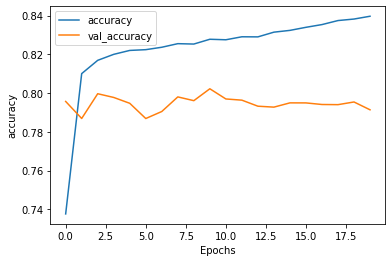

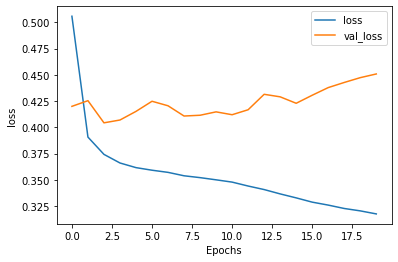

In [40]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')